# Figure 3A

In [1]:
# required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Predicted clone trajectories', y=1.05, size=65)
    plt.xlabel('Time (days)')
    plt.ylabel('AP position' + ' (' + r'$\mu$'+'m)')
    plt.xlim(0,8)
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_3A.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')    

<ipython-input-4-341bb3d3fb7a>:31: RuntimeWarning: Mean of empty slice.
  clones_pos_t.append(positions.mean())


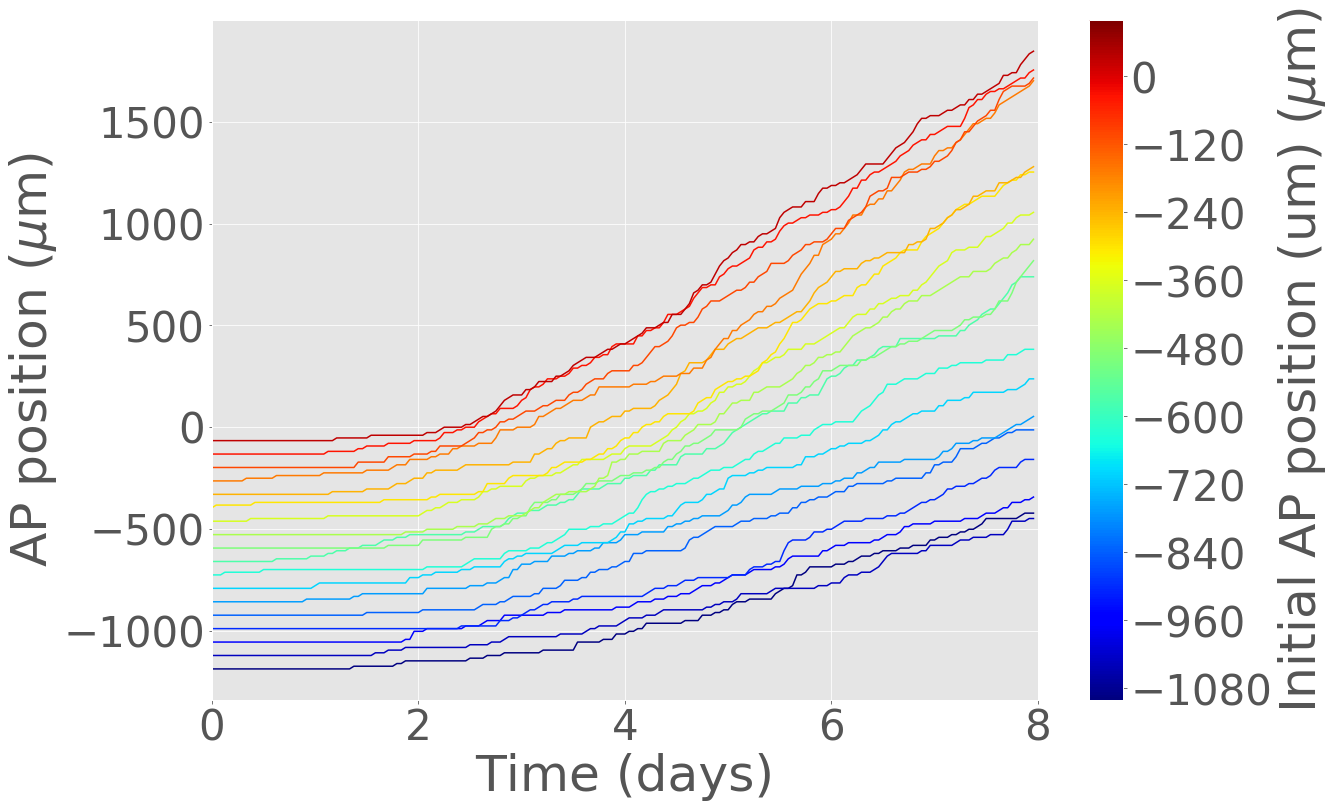

In [4]:
n0 = 200  # Number of cells after amputation
l = -1050  # Recruitment limit
tau = 24 # Delay
cell_diameter = 13.2

root = '../main/simulations/outgrowth/'
parameters_set = "n0="+str(n0)+"_l="+str(l)+"_tau="+str(tau)
folder = root+parameters_set+'/trajectories/'

times = np.arange(0,8*24)
clones_pos = np.arange(110,n0+5,5)    # From -1100 to 0um (50um by 50um). Similar to Rost et al.

fig = plt.figure()
ax1 = fig.add_subplot(111)

files = os.listdir(folder)
ordered_files = sorted(files)
random.seed(33)
random.shuffle(ordered_files)

tracks = []
i = 0
for clon in clones_pos:
    opened_file = open(folder+ordered_files[i])
    df0 = pd.read_csv(opened_file, delimiter=',')
    cells = df0['positions']
    clones_pos_t = []
    for t in times:
        cells_clean = np.asarray(cells[t].split("]")[0].split()[1:]).astype(np.float)
        positions = np.argwhere(cells_clean==clon)
        clones_pos_t.append(positions.mean())
    tracks.append(clones_pos_t)
    i += 1

colors = cm.jet(np.linspace(0,1,len(clones_pos)))
for trajectory,color in zip(tracks,colors):
    ax1.plot(times/24, (np.asarray(trajectory)-n0)*cell_diameter, color=color)

sm = cm.ScalarMappable(cmap='jet')
sm.set_array([])
plt.colorbar(sm, boundaries=np.arange(-1100,100),label='Initial AP position (um)'+ ' (' + r'$\mu$'+'m)')
plot_create()